Profit for first box:

(Multiplier * 10000)/(I + 100*P)

Profit for second box:

(Multiplier * 10000)/(I + 100*P) - 50,000

(Multiplier- 5I)/500 > P for second box to be profitable

In [149]:
import numpy as np
from scipy.optimize import minimize
import itertools
from tqdm.auto import tqdm
from random import randint
import matplotlib.pyplot as plt

In [ ]:
containers = np.array([(10,1),(80,6),(37,3),(17,1),(90,10),(31,2),(50,4),(20,2),(73,4),(89,8)])

In [487]:
[i/j for i,j in containers]

[np.float64(10.0),
 np.float64(13.333333333333334),
 np.float64(12.333333333333334),
 np.float64(17.0),
 np.float64(9.0),
 np.float64(15.5),
 np.float64(12.5),
 np.float64(10.0),
 np.float64(18.25),
 np.float64(11.125)]

In [4]:
p_values = [(container[0]-5*container[1])/500 for container in containers]

In [5]:
p_values

[np.float64(0.01),
 np.float64(0.1),
 np.float64(0.044),
 np.float64(0.024),
 np.float64(0.08),
 np.float64(0.042),
 np.float64(0.06),
 np.float64(0.02),
 np.float64(0.106),
 np.float64(0.098)]

In [6]:
# First box
worst_case_scenarios = [(10000*container[0])/(container[1]+100) for container in containers]

In [7]:
worst_case_scenarios

[np.float64(990.0990099009902),
 np.float64(7547.169811320755),
 np.float64(3592.233009708738),
 np.float64(1683.1683168316831),
 np.float64(8181.818181818182),
 np.float64(3039.2156862745096),
 np.float64(4807.692307692308),
 np.float64(1960.7843137254902),
 np.float64(7019.2307692307695),
 np.float64(8240.74074074074)]

In [30]:

def minimize_ev(multiplier_1,individuals_1, multiplier_2, individuals_2):
    def function(x):
        p1,p2 = x
        return (multiplier_1 * 10000)/(individuals_1 + 100*p1) + (multiplier_2 * 10000)/(individuals_2 + 100*p2) - 50000

    bounds = [(0,1),(0,1)]
    constraints = [{
    'type': 'ineq',
    'fun': lambda x: 1 - x[0] - x[1]
     }]
    x0 = [1,1]
    return minimize(fun=function,x0=x0,bounds=bounds,constraints=constraints)





In [31]:
result = minimize_ev(10,1,80,6)

In [44]:
container_combos = list(itertools.combinations(containers,2))

In [45]:
len(container_combos)

45

In [46]:
for combo in container_combos:
    if combo[0][0] == combo[1][0] and combo[0][1] == combo[1][1]:
        print(combo)

In [47]:
container_combos = [[combo[0][0],combo[0][1],combo[1][0],combo[1][1]] for combo in container_combos]

In [48]:
len(container_combos)

45

In [49]:
minimums = []
for combo in tqdm(container_combos,"Progress"):
    result = minimize_ev(combo[0],combo[1],combo[2],combo[3])
    minimums.append((result.fun, result.x[0], result.x[1], combo[0], combo[1], combo[2], combo[3]))


Progress: 100%|██████████| 45/45 [00:00<00:00, 218.12it/s]


In [59]:
[",".join([str(i) for i in e[3:]]) for e in sorted(minimums)[::-1][:10]]

['90,10,89,8',
 '80,6,89,8',
 '80,6,90,10',
 '73,4,89,8',
 '90,10,73,4',
 '80,6,73,4',
 '50,4,89,8',
 '90,10,50,4',
 '80,6,50,4',
 '50,4,73,4']

In [75]:
ratios = [container[0]/container[1] for container in containers]

In [76]:
ratios = np.array([ratio/sum(ratios) for ratio in ratios])

In [77]:
ratios

array([0.07749435, 0.1033258 , 0.09557636, 0.13174039, 0.06974491,
       0.12011624, 0.09686794, 0.07749435, 0.14142719, 0.08621246])

In [78]:
sum(ratios)

np.float64(0.9999999999999999)

In [66]:
container_combos[:5]

[[np.int64(10), np.int64(1), np.int64(80), np.int64(6)],
 [np.int64(10), np.int64(1), np.int64(37), np.int64(3)],
 [np.int64(10), np.int64(1), np.int64(17), np.int64(1)],
 [np.int64(10), np.int64(1), np.int64(90), np.int64(10)],
 [np.int64(10), np.int64(1), np.int64(31), np.int64(2)]]

In [71]:
indexed_combos = list(itertools.combinations([*range(10)],2))

In [72]:
len(indexed_combos)

45

In [83]:
indexed_combos+=[(j,i) for i,j in indexed_combos]

In [84]:
len(indexed_combos)

90

In [488]:
def evaluate_combo(containers, combo,ratios):
    multiplier_1 = containers[combo[0]][0]
    individuals_1 = containers[combo[0]][1]
    multiplier_2 = containers[combo[1]][0]
    individuals_2 = containers[combo[1]][1]
    p1 = ratios[combo[0]]
    p2 = ratios[combo[1]]
    return (10000*multiplier_1)/(individuals_1 + 100*p1) + (10000*multiplier_2)/(individuals_2 + 100*p2) - 50000
def evaluate_combo_but_on_first(containers, combo, ratios):
    multiplier_1 = containers[combo[0]][0]
    individuals_1 = containers[combo[0]][1]
    multiplier_2 = containers[combo[1]][0]
    individuals_2 = containers[combo[1]][1]
    p1 = ratios[combo[0]]
    p2 = ratios[combo[1]]
    return (10000*multiplier_1)/(individuals_1 + 100*p1)
def maximize_with_prior(containers,ratios,power,combos,top):
   raised_prior = ratios**power
   values = []
   for combo in combos:
         value = evaluate_combo_but_on_first(containers,combo,raised_prior)
         values.append((float(value),containers[combo[0]],containers[combo[1]],combo))
#    print(values)
   return sorted(values,key=lambda x: x[0],reverse=True)[:top]

In [489]:
maximize_with_prior(containers,ratios,1,indexed_combos,10)

[(53545.92431424354, array([89,  8]), array([10,  1]), (9, 0)),
 (53545.92431424354, array([89,  8]), array([80,  6]), (9, 1)),
 (53545.92431424354, array([89,  8]), array([37,  3]), (9, 2)),
 (53545.92431424354, array([89,  8]), array([17,  1]), (9, 3)),
 (53545.92431424354, array([89,  8]), array([90, 10]), (9, 4)),
 (53545.92431424354, array([89,  8]), array([31,  2]), (9, 5)),
 (53545.92431424354, array([89,  8]), array([50,  4]), (9, 6)),
 (53545.92431424354, array([89,  8]), array([20,  2]), (9, 7)),
 (53545.92431424354, array([89,  8]), array([73,  4]), (9, 8)),
 (53020.73425908313, array([90, 10]), array([31,  2]), (4, 5))]

In [112]:
maximize_with_prior(containers,ratios,2,indexed_combos,10)

[(184855.565779821, array([80,  6]), array([73,  4]), (1, 8)),
 (184855.565779821, array([73,  4]), array([80,  6]), (8, 1)),
 (173456.0302613695, array([73,  4]), array([89,  8]), (8, 9)),
 (173456.0302613695, array([89,  8]), array([73,  4]), (9, 8)),
 (172911.92568018922, array([50,  4]), array([73,  4]), (6, 8)),
 (172911.92568018922, array([73,  4]), array([50,  4]), (8, 6)),
 (166208.23067840416, array([37,  3]), array([73,  4]), (2, 8)),
 (166208.23067840416, array([73,  4]), array([37,  3]), (8, 2)),
 (164984.95172770994, array([80,  6]), array([89,  8]), (1, 9)),
 (164984.95172770994, array([89,  8]), array([80,  6]), (9, 1))]

In [116]:
ratios**1

array([0.07749435, 0.1033258 , 0.09557636, 0.13174039, 0.06974491,
       0.12011624, 0.09686794, 0.07749435, 0.14142719, 0.08621246])

In [113]:
[maximize_with_prior(containers,ratios,i,indexed_combos,10)[0] for i in range(1,11)]

[(56566.65857332667, array([90, 10]), array([89,  8]), (4, 9)),
 (184855.565779821, array([80,  6]), array([73,  4]), (1, 8)),
 (263086.19705841073, array([31,  2]), array([73,  4]), (5, 8)),
 (295721.85937141906, array([17,  1]), array([73,  4]), (3, 8)),
 (301570.2878827861, array([17,  1]), array([73,  4]), (3, 8)),
 (302374.67317420046, array([17,  1]), array([73,  4]), (3, 8)),
 (302483.12961209484, array([17,  1]), array([73,  4]), (3, 8)),
 (302497.72736340784, array([17,  1]), array([73,  4]), (3, 8)),
 (302499.69352634053, array([17,  1]), array([73,  4]), (3, 8)),
 (302499.95862459263, array([17,  1]), array([73,  4]), (3, 8))]

In [118]:
evaluate_combo(containers,(8,9),[0,0,0,0,0,0,0,0,0.1,0.1])

np.float64(51587.3015873016)

Calculate Reasonable maxes for reasonable distributions

In [123]:
evs = []
for combo in indexed_combos:
    evs.append((evaluate_combo(containers,combo,[0.1]*10),containers[combo[0]],containers[combo[1]],combo))

In [124]:
sorted(evs,key=lambda x: x[0],reverse=True)[:10]

[(np.float64(52142.857142857145), array([80,  6]), array([73,  4]), (1, 8)),
 (np.float64(52142.857142857145), array([73,  4]), array([80,  6]), (8, 1)),
 (np.float64(51587.3015873016), array([73,  4]), array([89,  8]), (8, 9)),
 (np.float64(51587.3015873016), array([89,  8]), array([73,  4]), (9, 8)),
 (np.float64(49444.44444444444), array([80,  6]), array([89,  8]), (1, 9)),
 (np.float64(49444.44444444444), array([89,  8]), array([80,  6]), (9, 1)),
 (np.float64(47142.857142857145), array([90, 10]), array([73,  4]), (4, 8)),
 (np.float64(47142.857142857145), array([73,  4]), array([90, 10]), (8, 4)),
 (np.float64(45000.0), array([80,  6]), array([90, 10]), (1, 4)),
 (np.float64(45000.0), array([90, 10]), array([80,  6]), (4, 1))]

Generating distributions and simulating

In [490]:
def generate_distribution(norm_sum):
    base = np.full(10, norm_sum/10)  # Start with 10% each
    deltas = np.random.uniform(-0.05, 0.05, 10)  # Random deltas between -5% and +5%
    perturbed = base + deltas
    # Ensure no negative values (in case the delta drops below zero)
    perturbed = np.clip(perturbed, 0, None)
    # Normalize to ensure the sum is 1
    normalized = perturbed / perturbed.sum()
    return normalized*norm_sum

def generate_n_distributions(n,norm_sum):
    return [generate_distribution(norm_sum) for _ in range(n)]


In [491]:
generate_distribution(1.5)

array([0.12807249, 0.14370426, 0.19483037, 0.19119252, 0.10782034,
       0.16421274, 0.14966741, 0.14220979, 0.1040952 , 0.17419486])

In [492]:
sum(generate_distribution(norm_sum=1.5))

np.float64(1.5)

In [493]:
container_dict = {i:container for i,container in enumerate(containers)}

In [494]:
container_dict

{0: array([10,  1]),
 1: array([80,  6]),
 2: array([37,  3]),
 3: array([17,  1]),
 4: array([90, 10]),
 5: array([31,  2]),
 6: array([50,  4]),
 7: array([20,  2]),
 8: array([73,  4]),
 9: array([89,  8])}

In [495]:
first_buckets = {i:0 for i in range(10)}

In [496]:
second_buckets = {i:0 for i in range(10)}

In [497]:
choices={"First":0, "Second":0}

In [499]:
first_buckets = {i:0 for i in range(10)}
second_buckets = {i:0 for i in range(10)}
choices={"First":0, "Second":0}
n_distributions = 1000
distributions = generate_n_distributions(n_distributions,norm_sum=1.25)
bests = []
for distribution in tqdm(distributions,"Progress"):
    best = max([(evaluate_combo(containers,combo,distribution),evaluate_combo_but_on_first(containers,combo,distribution),combo) for combo in indexed_combos],key = lambda x: x[1])
    # print
    bests.append((best[0],best[1],container_dict[best[-1][0]],container_dict[best[-1][1]],best[-1]))
    if best[1]>=best[0]:
        choices["First"]+=1
    else:
        choices["Second"]+=1
    first_buckets[best[-1][0]] += 1
    second_buckets[best[-1][1]] += 1

Progress:   0%|          | 0/1000 [00:00<?, ?it/s]

Progress: 100%|██████████| 1000/1000 [00:00<00:00, 1754.38it/s]


In [500]:
first_buckets

{0: 0, 1: 269, 2: 0, 3: 0, 4: 114, 5: 0, 6: 7, 7: 0, 8: 350, 9: 260}

In [501]:
second_buckets

{0: 260, 1: 0, 2: 269, 3: 0, 4: 0, 5: 114, 6: 0, 7: 7, 8: 0, 9: 350}

Text(0.5, 1.0, 'Second Container')

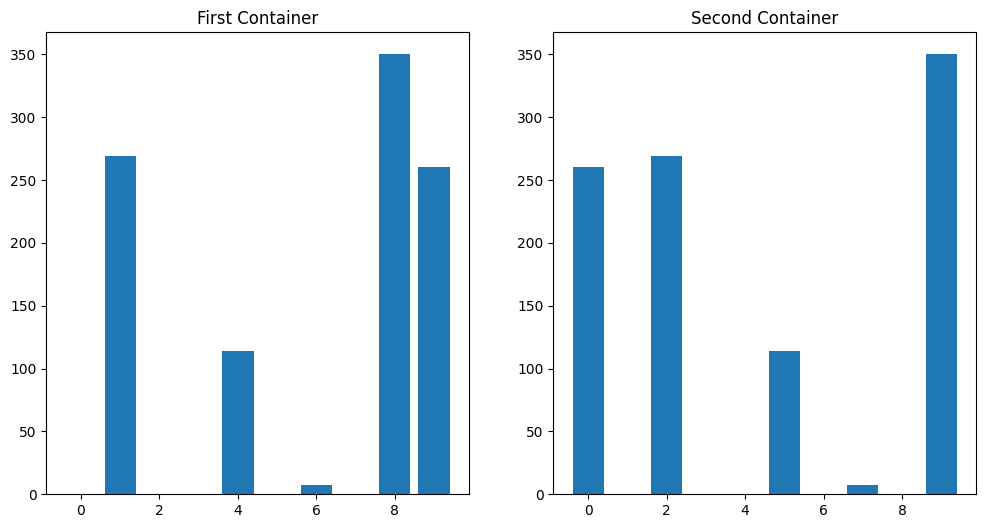

In [502]:
plt.figure(figsize=(12, 6))
plt.subplot(121).bar(first_buckets.keys(), first_buckets.values())
plt.title("First Container")
plt.subplot(122).bar(second_buckets.keys(), second_buckets.values())
plt.title("Second Container")

In [505]:
containers

array([[10,  1],
       [80,  6],
       [37,  3],
       [17,  1],
       [90, 10],
       [31,  2],
       [50,  4],
       [20,  2],
       [73,  4],
       [89,  8]])

In [503]:
containers[8]

array([73,  4])

In [504]:
sorted(bests,key=lambda x: x[0],reverse=True)[:10]

[(np.float64(72399.12089330252),
  np.float64(66485.74003035868),
  array([73,  4]),
  array([89,  8]),
  (8, 9)),
 (np.float64(67629.0726983564),
  np.float64(62959.11372018519),
  array([73,  4]),
  array([89,  8]),
  (8, 9)),
 (np.float64(66263.29631875543),
  np.float64(63280.542576419226),
  array([73,  4]),
  array([89,  8]),
  (8, 9)),
 (np.float64(66056.3633738856),
  np.float64(65566.26752925511),
  array([73,  4]),
  array([89,  8]),
  (8, 9)),
 (np.float64(65907.86357106363),
  np.float64(59342.936529027684),
  array([73,  4]),
  array([89,  8]),
  (8, 9)),
 (np.float64(65565.4170291714),
  np.float64(59928.01715835555),
  array([73,  4]),
  array([89,  8]),
  (8, 9)),
 (np.float64(65548.81060549064),
  np.float64(60395.75106322228),
  array([73,  4]),
  array([89,  8]),
  (8, 9)),
 (np.float64(64033.251804148575),
  np.float64(61326.83087608246),
  array([73,  4]),
  array([89,  8]),
  (8, 9)),
 (np.float64(63275.08737818581),
  np.float64(60394.42024893522),
  array([73,  

In [420]:
sum([best[1] for best in bests])/len(bests), min([best[1] for best in bests]), max([best[1] for best in bests])

(np.float64(54215.63874842508),
 np.float64(39078.870137205384),
 np.float64(74942.43377058719))

In [421]:
sum([best[0] for best in bests])/len(bests), min([best[0] for best in bests]), max([best[0] for best in bests])

(np.float64(29982.836581893283),
 np.float64(-3219.577630637941),
 np.float64(74834.01340839393))

In [506]:
choices

{'First': 969, 'Second': 31}

In [423]:
containers

array([[10,  1],
       [80,  6],
       [37,  3],
       [17,  1],
       [90, 10],
       [31,  2],
       [50,  4],
       [20,  2],
       [73,  4],
       [89,  8]])

In [405]:
n_distributions = 1000
distributions = generate_n_distributions(n_distributions)
bests = []
for distribution in tqdm(distributions,"Progress"):
    best = max([(evaluate_combo_but_on_first(containers,combo,distribution),combo) for combo in indexed_combos],key = lambda x: x[0])
    bests.append((best[0],container_dict[best[1][0]],container_dict[best[1][1]],best[1]))
    first_buckets[best[-1][0]] += 1
    second_buckets[best[-1][1]] += 1

TypeError: generate_n_distributions() missing 1 required positional argument: 'norm_sum'

In [238]:
sorted(bests,key=lambda x: x[0],reverse=True)[:10]

[(np.float64(87820.06052259966), array([73,  4]), array([89,  8]), (8, 9)),
 (np.float64(83349.00517546931), array([73,  4]), array([89,  8]), (8, 9)),
 (np.float64(82910.47463895142), array([73,  4]), array([89,  8]), (8, 9)),
 (np.float64(82464.11343027696), array([73,  4]), array([89,  8]), (8, 9)),
 (np.float64(81104.35431945806), array([73,  4]), array([89,  8]), (8, 9)),
 (np.float64(80704.93161835866), array([73,  4]), array([89,  8]), (8, 9)),
 (np.float64(80462.34036146672), array([73,  4]), array([89,  8]), (8, 9)),
 (np.float64(80324.26942048584), array([73,  4]), array([89,  8]), (8, 9)),
 (np.float64(80270.23735141975), array([73,  4]), array([89,  8]), (8, 9)),
 (np.float64(79970.901438366), array([73,  4]), array([89,  8]), (8, 9))]

In [239]:
sum(best[0] for best in bests)/len(bests)

np.float64(61880.88681479355)

In [240]:
min(best[0] for best in bests)

np.float64(43577.28280787944)

In [241]:
max([best[0] for best in bests])

np.float64(87820.06052259966)

In [507]:
def generate_random__dirichlet_distribution(size=10, norm_sum=1):
    
    return np.random.dirichlet(np.ones(size), size=1)[0] * norm_sum


In [508]:
sum(generate_random__dirichlet_distribution(norm_sum=1.5))

np.float64(1.5)

In [509]:
def generate_capped_distribution(size=10, cap=0.15,norm_sum=1):
    while True:
        values = np.random.rand(size)
        values = values / values.sum()  # Normalize to sum to 1

        # Clip values at the cap
        clipped = np.minimum(values, cap)
        clipped_sum = clipped.sum()

        # If the clipped sum is exactly 1, we’re done
        if np.isclose(clipped_sum, norm_sum):
            return clipped

        # Redistribute the difference
        excess = norm_sum - clipped_sum
        room = cap - clipped  # Room left for each value
        room[clipped >= cap] = 0  # No room in already-capped values

        if room.sum() == 0:
            continue  # Try again — no space to redistribute

        # Proportionally redistribute the excess to values under the cap
        redistribute = (room / room.sum()) * excess
        adjusted = clipped + redistribute

        return adjusted


In [430]:
sum(generate_capped_distribution(cap=0.175,norm_sum=1.5))

np.float64(1.5)

In [432]:
generate_capped_distribution(cap=0.16,norm_sum=1.1)

array([0.13583404, 0.07961285, 0.16      , 0.08443274, 0.04930839,
       0.04990952, 0.16      , 0.06090246, 0.16      , 0.16      ])

In [510]:
first_buckets = {i:0 for i in range(10)}
second_buckets = {i:0 for i in range(10)}
choices={"First":0, "Second":0}
n_distributions = 1000
distributions = [generate_random__dirichlet_distribution(norm_sum=1.25) for _ in range(n_distributions)]
bests = []
for distribution in tqdm(distributions,"Progress"):
    best = max([(evaluate_combo(containers,combo,distribution),evaluate_combo_but_on_first(containers,combo,distribution),combo) for combo in indexed_combos],key = lambda x: x[1])
    # print
    bests.append((best[0],best[1],container_dict[best[-1][0]],container_dict[best[-1][1]],best[-1]))
    if best[1]>=best[0]:
        choices["First"]+=1
    else:
        choices["Second"]+=1
    first_buckets[best[-1][0]] += 1
    second_buckets[best[-1][1]] += 1

Progress:   0%|          | 0/1000 [00:00<?, ?it/s]

Progress: 100%|██████████| 1000/1000 [00:00<00:00, 2073.53it/s]


In [511]:
max([best[1] for best in bests]), min([best[1] for best in bests]), sum(best[1] for best in bests)/len(bests)

(np.float64(181886.17298503485),
 np.float64(44206.26513583666),
 np.float64(103229.85098366212))

In [512]:
choices

{'First': 725, 'Second': 275}

Text(0.5, 1.0, 'Second Container')

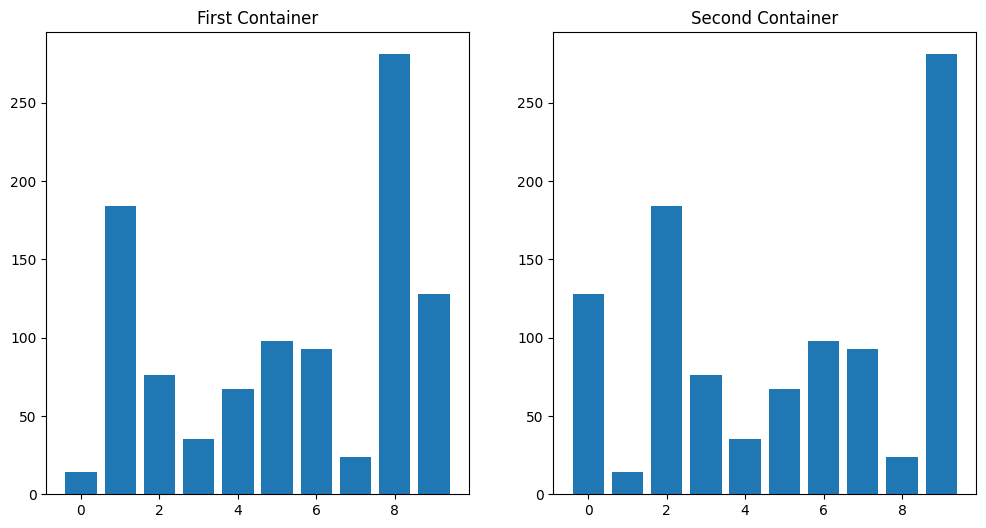

In [513]:
plt.figure(figsize=(12, 6))
plt.subplot(121).bar(first_buckets.keys(), first_buckets.values())
plt.title("First Container")
plt.subplot(122).bar(second_buckets.keys(), second_buckets.values())
plt.title("Second Container")

In [453]:
first_buckets = {i:0 for i in range(10)}
second_buckets = {i:0 for i in range(10)}
choices={"First":0, "Second":0}
n_distributions = 1000
distributions = [generate_capped_distribution(cap=0.17,norm_sum=1.25) for _ in range(n_distributions)]
bests = []
for distribution in tqdm(distributions,"Progress"):
    best = max([(evaluate_combo(containers,combo,distribution),evaluate_combo_but_on_first(containers,combo,distribution),combo) for combo in indexed_combos],key = lambda x: x[1])
    # print
    bests.append((best[0],best[1],container_dict[best[-1][0]],container_dict[best[-1][1]],best[-1]))
    if best[1]>=best[0]:
        choices["First"]+=1
    else:
        choices["Second"]+=1
    first_buckets[best[-1][0]] += 1
    second_buckets[best[-1][1]] += 1

Progress: 100%|██████████| 1000/1000 [00:00<00:00, 2423.91it/s]


In [454]:
max([best[1] for best in bests]), min([best[1] for best in bests]), sum(best[1] for best in bests)/len(bests)

(np.float64(72451.80856503465),
 np.float64(39020.35270208579),
 np.float64(54080.581623893275))

In [455]:
choices

{'First': 959, 'Second': 41}

Text(0.5, 1.0, 'Second Container')

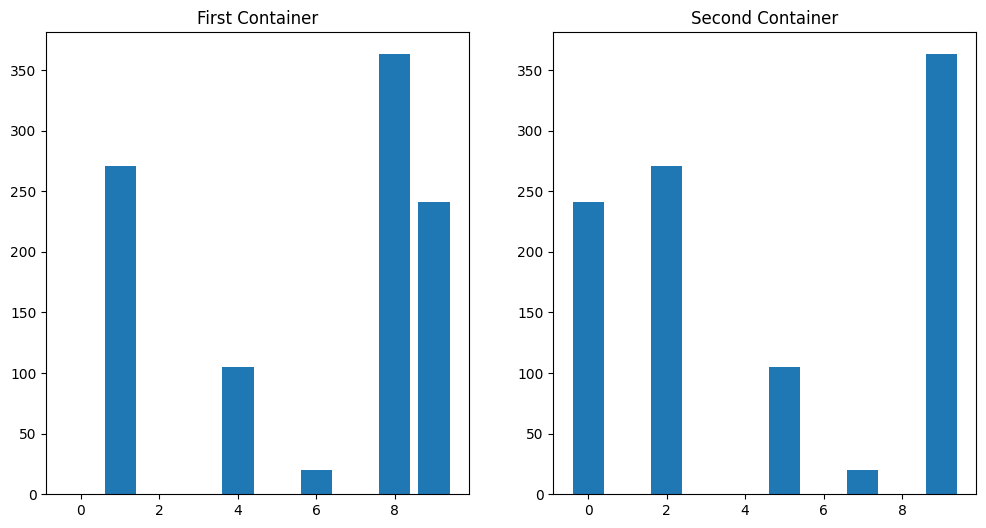

In [457]:
plt.figure(figsize=(12, 6))
plt.subplot(121).bar(first_buckets.keys(), first_buckets.values())
plt.title("First Container")
plt.subplot(122).bar(second_buckets.keys(), second_buckets.values())
plt.title("Second Container")

In [515]:
def generate_biased_distribution(delta_range=0.03,norm_sum=1):
    base = np.full(10, 0.5*norm_sum/6)  # Start with base value for non-biased containers
    bias_indices = [1, 4, 8, 9]

    for i in bias_indices:
        base[i] = 0.5*norm_sum/4

    # Apply random delta in ±delta_range
    deltas = np.random.uniform(-delta_range, delta_range, size=10)
    perturbed = base + deltas

    # Prevent negative values
    perturbed = np.clip(perturbed, 0, None)

    # Normalize to make the total sum to 1
    normalized = perturbed / perturbed.sum()

    return normalized*norm_sum


In [529]:
def generate_biased_distribution_73_4(delta_range=0.03,norm_sum=1):
    base = np.full(10, 0.5*norm_sum/9)  # Start with base value for non-biased containers
    bias_indices = [8]

    for i in bias_indices:
        base[i] = 0.4

    # Apply random delta in ±delta_range
    deltas = np.random.uniform(-delta_range, delta_range, size=10)
    perturbed = base + deltas

    # Prevent negative values
    perturbed = np.clip(perturbed, 0, None)

    # Normalize to make the total sum to 1
    normalized = perturbed / perturbed.sum()

    return normalized*norm_sum


In [ ]:
def generate_biased_distribution_73_4(delta_range=0.03,norm_sum=1):
    base = np.full(10, 0.5*norm_sum/9)  # Start with base value for non-biased containers
    bias_indices = [8]

    for i in bias_indices:
        base[i] = 0.4

    # Apply random delta in ±delta_range
    deltas = np.random.uniform(-delta_range, delta_range, size=10)
    perturbed = base + deltas

    # Prevent negative values
    perturbed = np.clip(perturbed, 0, None)

    # Normalize to make the total sum to 1
    normalized = perturbed / perturbed.sum()

    return normalized*norm_sum


In [530]:
containers[1],containers[4],containers[8],containers[9]

(array([80,  6]), array([90, 10]), array([73,  4]), array([89,  8]))

In [532]:
generate_biased_distribution_73_4(delta_range=0.03,norm_sum=1.25)

array([0.05507526, 0.12213937, 0.07026632, 0.09954663, 0.09573337,
       0.07568193, 0.05671153, 0.10415557, 0.46328186, 0.10740818])

In [516]:
generate_biased_distribution(delta_range=0.05,norm_sum=1.25)

array([0.12356089, 0.1425856 , 0.10639158, 0.11996776, 0.14563238,
       0.11005921, 0.1240468 , 0.12170666, 0.1442147 , 0.11183442])

In [517]:
sum(generate_biased_distribution(delta_range=0.05,norm_sum=1.25))

np.float64(1.2499999999999998)

In [518]:
first_buckets = {i:0 for i in range(10)}
second_buckets = {i:0 for i in range(10)}
choices={"First":0, "Second":0}
n_distributions = 1000
distributions = [generate_biased_distribution(delta_range=0.04,norm_sum=1.25) for _ in range(n_distributions)]
bests = []
for distribution in tqdm(distributions,"Progress"):
    best = max([(evaluate_combo(containers,combo,distribution),evaluate_combo_but_on_first(containers,combo,distribution),combo) for combo in indexed_combos],key = lambda x: x[1])
    # print
    bests.append((best[0],best[1],container_dict[best[-1][0]],container_dict[best[-1][1]],best[-1]))
    if best[1]>=best[0]:
        choices["First"]+=1
    else:
        choices["Second"]+=1
    first_buckets[best[-1][0]] += 1
    second_buckets[best[-1][1]] += 1

Progress:   0%|          | 0/1000 [00:00<?, ?it/s]

Progress: 100%|██████████| 1000/1000 [00:00<00:00, 2062.31it/s]


In [519]:
max([best[1] for best in bests]), min([best[1] for best in bests]), sum(best[1] for best in bests)/len(bests)

(np.float64(51588.35301785112),
 np.float64(34889.97357685593),
 np.float64(42417.12494051716))

In [520]:
choices

{'First': 1000, 'Second': 0}

Text(0.5, 1.0, 'Second Container')

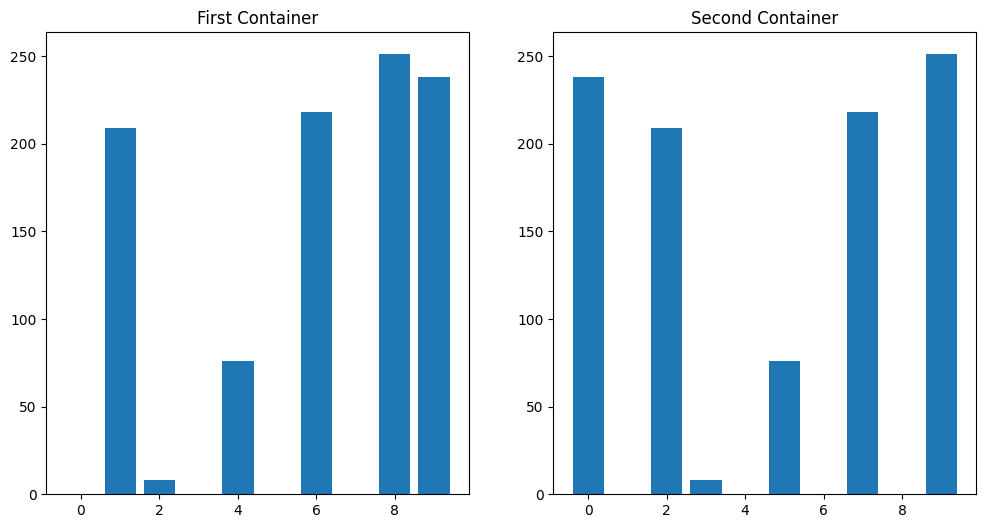

In [521]:
plt.figure(figsize=(12, 6))
plt.subplot(121).bar(first_buckets.keys(), first_buckets.values())
plt.title("First Container")
plt.subplot(122).bar(second_buckets.keys(), second_buckets.values())
plt.title("Second Container")

In [533]:
containers

array([[10,  1],
       [80,  6],
       [37,  3],
       [17,  1],
       [90, 10],
       [31,  2],
       [50,  4],
       [20,  2],
       [73,  4],
       [89,  8]])

In [538]:
[i/j for i,j in containers]

[np.float64(10.0),
 np.float64(13.333333333333334),
 np.float64(12.333333333333334),
 np.float64(17.0),
 np.float64(9.0),
 np.float64(15.5),
 np.float64(12.5),
 np.float64(10.0),
 np.float64(18.25),
 np.float64(11.125)]

In [539]:
base_ev = [i/j for i,j in containers]/sum([i/j for i,j in containers])

In [542]:
base_ev

array([0.07749435, 0.1033258 , 0.09557636, 0.13174039, 0.06974491,
       0.12011624, 0.09686794, 0.07749435, 0.14142719, 0.08621246])

In [544]:
(base_ev**3)/sum(base_ev**3)

array([0.03996692, 0.09473641, 0.07497943, 0.19635749, 0.02913589,
       0.14883182, 0.0780604 , 0.03996692, 0.24293457, 0.05503016])

In [545]:
sum((base_ev**3)/sum(base_ev**3))

np.float64(1.0)

In [546]:
def formula(container,p):
    multiplier = container[0]
    individuals = container[1]
    return (multiplier * 10000)/(individuals + 100*p) 

In [573]:
def generate_gu_distribution(containers,iters, power):
    base_ev = [i/j for i,j in containers]/sum([i/j for i,j in containers])
    order = (base_ev**power)/sum(base_ev**power)
    for i in range(iters):
        new_order = np.array([formula(container,order[i]) for i,container in enumerate(containers)])
        order = (new_order**power)/sum(new_order**power)
    return order

In [607]:
containers

array([[10,  1],
       [80,  6],
       [37,  3],
       [17,  1],
       [90, 10],
       [31,  2],
       [50,  4],
       [20,  2],
       [73,  4],
       [89,  8]])

In [612]:
generate_gu_distribution(containers,iters=1,power=3)

array([0.0084215 , 0.14518767, 0.04599704, 0.00058739, 0.35565098,
       0.00650368, 0.07980583, 0.03897553, 0.01804463, 0.30082575])

In [632]:
gugu = generate_gu_distribution(containers,iters=3,power=3)

In [634]:
gugu

array([6.54397854e-03, 2.83553228e-01, 9.95287880e-02, 6.04987662e-06,
       1.19292549e-01, 5.02812745e-04, 1.80255426e-01, 8.87143820e-02,
       2.89761992e-03, 2.18705165e-01])

In [633]:
sorted([(formula(container,gugu[i]),container) for i,container in enumerate(containers)])[::-1][:4]

[(np.float64(170172.61130453844), array([73,  4])),
 (np.float64(169897.21428152925), array([17,  1])),
 (np.float64(151198.76665235916), array([31,  2])),
 (np.float64(60444.95269817405), array([10,  1]))]

In [580]:
weighted = 0.25*generate_gu_distribution(containers,iters=0,power=3) + 0.45*generate_gu_distribution(containers,iters=1,power=3) + 0.2*generate_gu_distribution(containers,iters=2,power=3) + 0.1*generate_gu_distribution(containers,iters=3,power=3)

In [602]:
sorted([(formula(container,weighted[i]),container) for i,container in enumerate(containers)])[::-1][:4]

[(np.float64(46294.91311379859), array([73,  4])),
 (np.float64(45005.3360936115), array([37,  3])),
 (np.float64(44737.69230334601), array([80,  6])),
 (np.float64(43392.58315678171), array([50,  4]))]

In [557]:
containers

array([[10,  1],
       [80,  6],
       [37,  3],
       [17,  1],
       [90, 10],
       [31,  2],
       [50,  4],
       [20,  2],
       [73,  4],
       [89,  8]])